Objective: Use visualizations to uncover cognitive patterns in the Stroop task (reaction times, errors, interference).

# 1. Import Libraries and Load Clean Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load clean dataset
data = pd.read_csv("stroop_clean.csv")

# Preview
data.head()

,Participant_ID,Gender,Age,Congruent_RT,Incongruent_RT,Errors,Interference
0,1,Male,33.0,620.37,726.98,0.0,106.61
1,3,Male,35.0,645.96,650.29,2.0,4.33
2,6,Female,26.0,583.41,652.40,0.0,68.99
3,7,Male,32.0,644.82,699.32,3.0,54.50
4,9,Male,18.0,604.47,709.13,3.0,104.66


# 2. Descriptive Statistics

In [20]:
# Summary statistics
print(data.describe())

       Participant_ID        Age  Congruent_RT  Incongruent_RT     Errors  \
count       88.000000  88.000000     88.000000       88.000000  88.000000   
mean        61.784091  25.500000    627.700682      714.702273   1.329545   
std         34.329187   5.317505     36.547312       44.279361   1.328049   
min          1.000000  18.000000    548.460000      615.950000   0.000000   
25%         32.750000  21.000000    602.140000      689.087500   0.000000   
50%         61.000000  24.000000    626.215000      712.540000   1.000000   
75%         90.250000  30.000000    654.145000      749.307500   2.000000   
max        120.000000  35.000000    721.570000      812.410000   8.000000   

       Interference  
count     88.000000  
mean      87.001591  
std       55.266342  
min      -42.120000  
25%       55.760000  
50%       90.190000  
75%      122.545000  
max      211.240000  




*   Do males and females differ in mean interference?



In [19]:
# Reaction Time Means by Gender
print(data.groupby("Gender")[["Congruent_RT", "Incongruent_RT", "Interference"]].mean())

        Congruent_RT  Incongruent_RT  Interference
Gender                                            
Female      627.9200      721.028333     93.108333
Male        627.4375      707.111000     79.673500




*   How variable are the reaction times?



In [22]:
# Reaction Time Standard Deviation by Gender
print(data.groupby("Gender")[["Congruent_RT", "Incongruent_RT", "Interference"]].std())

        Congruent_RT  Incongruent_RT  Interference
Gender                                            
Female     38.697229       39.884015     45.662433
Male       34.276400       48.460143     64.806276


# 3. Univariate Visualizations

(a) Histogram of Reaction Times

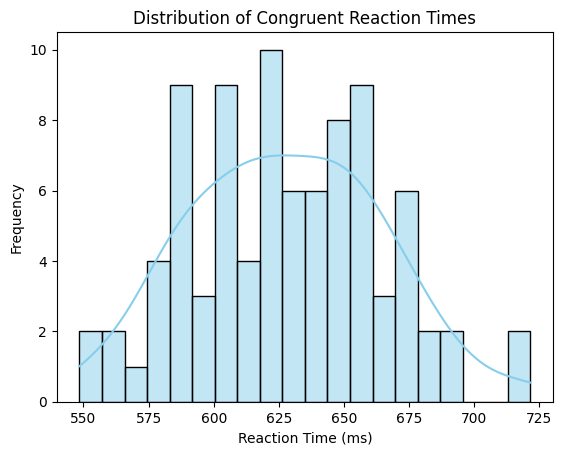

In [25]:
sns.histplot(data["Congruent_RT"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Congruent Reaction Times")
plt.xlabel("Reaction Time (ms)")
plt.ylabel("Frequency")
plt.show()

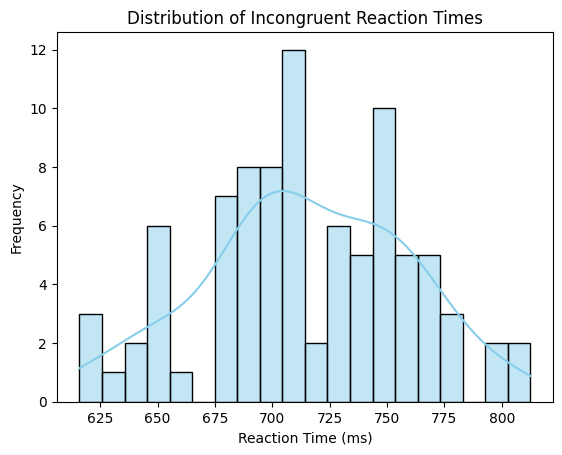

In [ ]:
sns.histplot(data["Incongruent_RT"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Incongruent Reaction Times")
plt.xlabel("Reaction Time (ms)")
plt.ylabel("Frequency")
plt.show()

(b) Histogram of Interference Scores

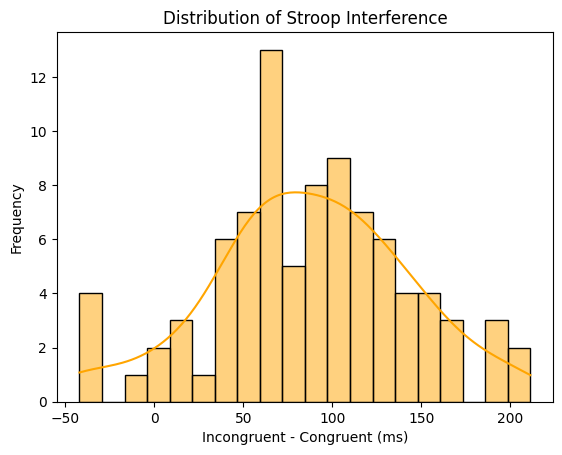

In [ ]:
sns.histplot(data["Interference"], bins=20, kde=True, color="orange")
plt.title("Distribution of Stroop Interference")
plt.xlabel("Incongruent - Congruent (ms)")
plt.ylabel("Frequency")
plt.show()



*   Is interference normally distributed, or skewed?
*   What does this say about cognitive control variability?


*   If the distribution is tight and narrow, most participants show similar interference - cognitive control ability is fairly consistent across people.

*   If the distribution is wide or skewed, it suggests individual differences - some participants experience strong interference (slower under conflict), while others handle it better (smaller difference).

*   A skewed tail toward high interference might indicate a subset of participants with poorer inhibition or higher susceptibility to distraction.



# 4. Bivariate Visualizations

(a) Boxplots: Congruent vs Incongruent RTs

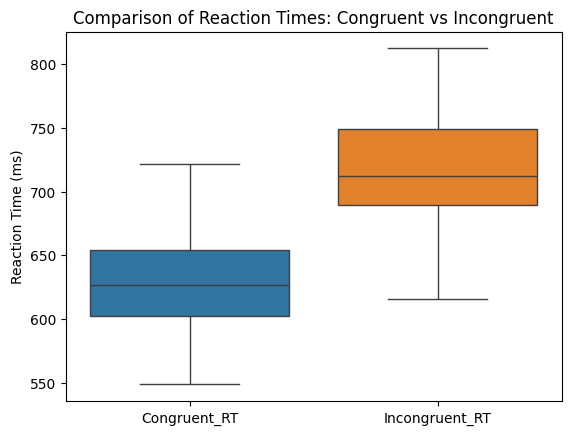

In [ ]:
sns.boxplot(data=data[["Congruent_RT", "Incongruent_RT"]])
plt.title("Comparison of Reaction Times: Congruent vs Incongruent")
plt.ylabel("Reaction Time (ms)")
plt.show()

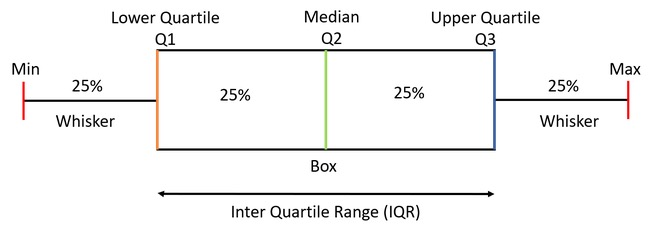

(b) Gender Differences in Interference

/tmp/ipython-input-614476664.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Gender", y="Interference", data=data, palette="Set2")


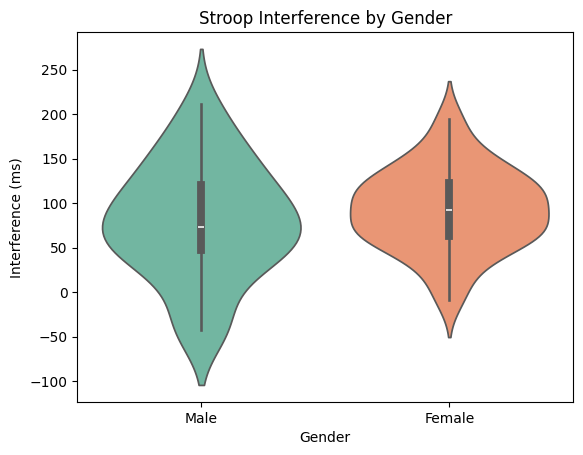

In [ ]:
sns.violinplot(x="Gender", y="Interference", data=data, palette="Set2")
plt.title("Stroop Interference by Gender")
plt.ylabel("Interference (ms)")
plt.show()



*   Are incongruent trials consistently slower?

*   Are there visible gender differences?



# 5. Relationship Visualization

(a) Age vs. Interference

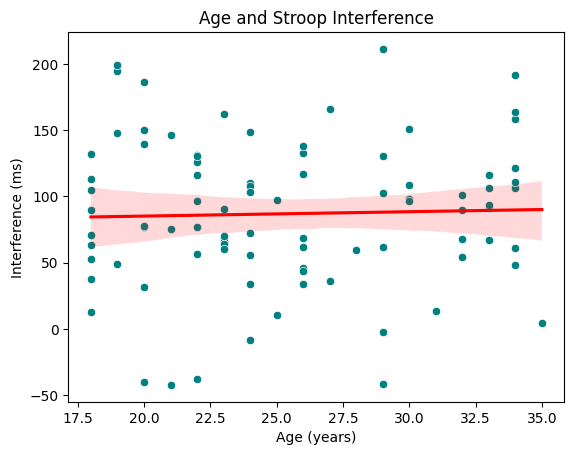

In [27]:
sns.scatterplot(x="Age", y="Interference", data=data, color="teal")
sns.regplot(x="Age", y="Interference", data=data, scatter=False, color="red")
plt.title("Age and Stroop Interference")
plt.xlabel("Age (years)")
plt.ylabel("Interference (ms)")
plt.show()



*   Does interference increase or decrease with age in this sample?



6. Error Patterns

(a) Errors vs Reaction Time

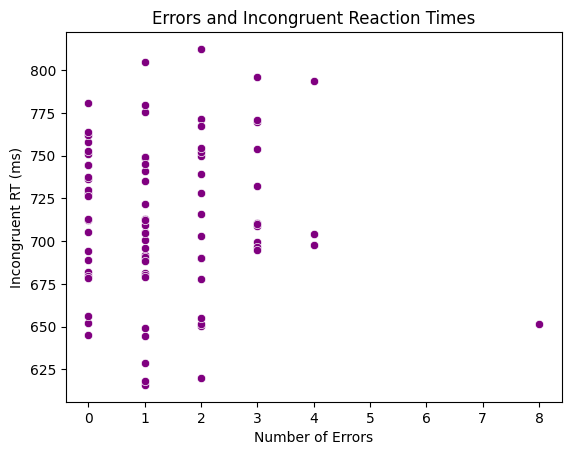

In [ ]:
sns.scatterplot(x="Errors", y="Incongruent_RT", data=data, color="purple")
plt.title("Errors and Incongruent Reaction Times")
plt.xlabel("Number of Errors")
plt.ylabel("Incongruent RT (ms)")
plt.show()



*   Do participants who respond faster make more errors (speed–accuracy tradeoff)?



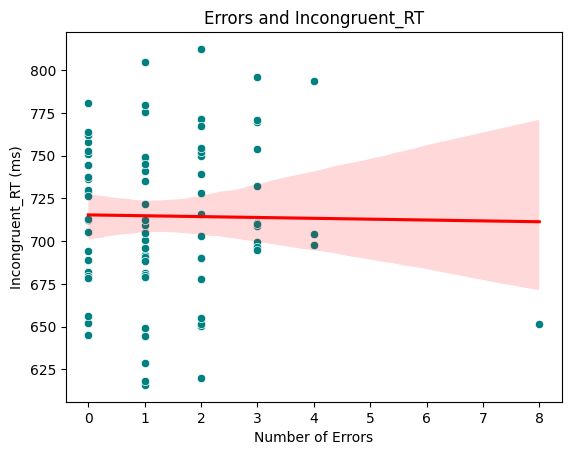

In [28]:
sns.scatterplot(x="Errors", y="Incongruent_RT", data=data, color="teal")
sns.regplot(x="Errors", y="Incongruent_RT", data=data, scatter=False, color="red")
plt.title("Errors and Incongruent_RT")
plt.xlabel("Number of Errors")
plt.ylabel("Incongruent_RT (ms)")
plt.show()

7. Combined Visualization (Pairplot)

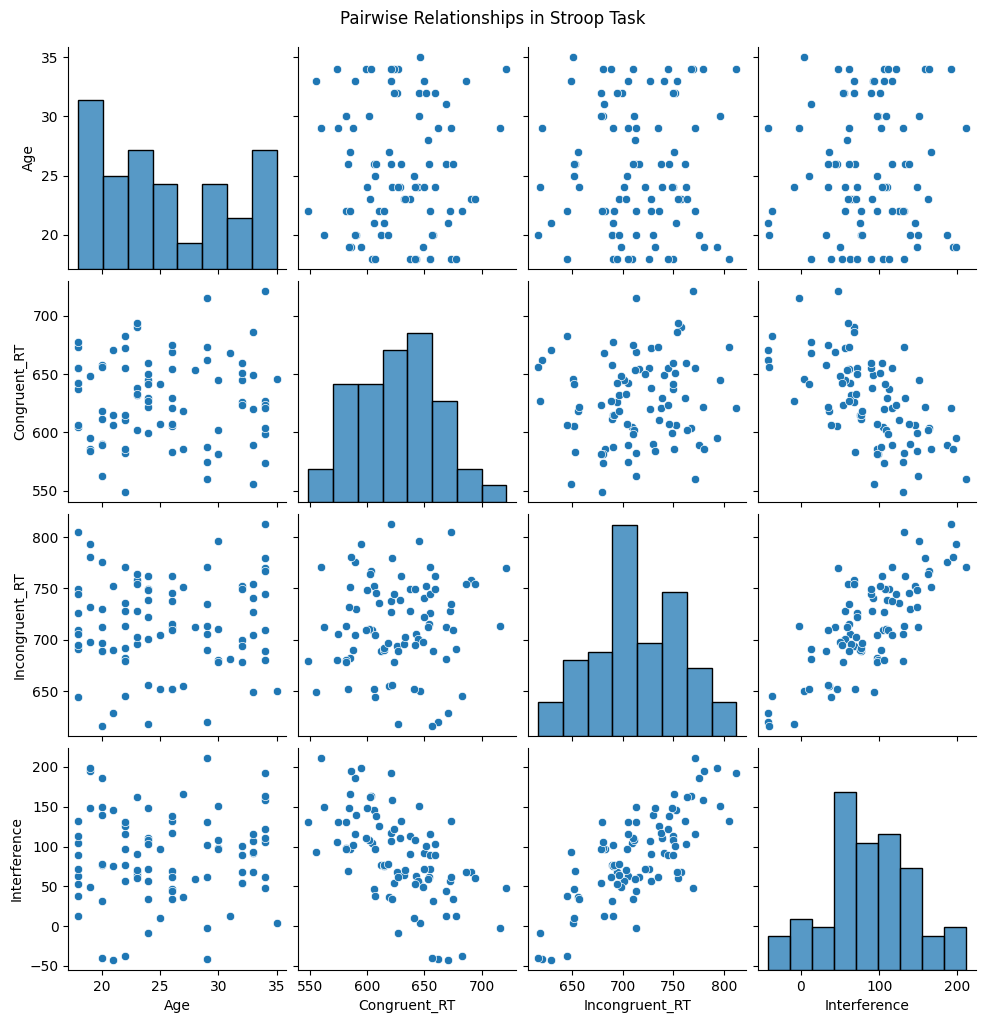

In [ ]:
sns.pairplot(data[["Age", "Congruent_RT", "Incongruent_RT", "Interference"]])
plt.suptitle("Pairwise Relationships in Stroop Task", y=1.02)
plt.show()

8. Summary Visualization – Mean Comparison

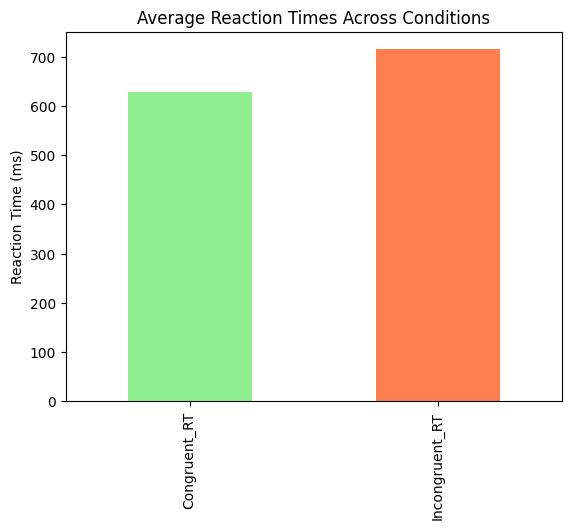

In [ ]:
means = data[["Congruent_RT", "Incongruent_RT"]].mean()
means.plot(kind='bar', color=['lightgreen', 'coral'])
plt.title("Average Reaction Times Across Conditions")
plt.ylabel("Reaction Time (ms)")
plt.show()

9. Export Figures for **Reports**

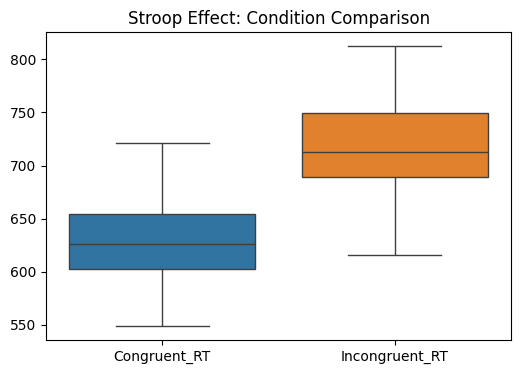

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=data[["Congruent_RT", "Incongruent_RT"]])
plt.title("Stroop Effect: Condition Comparison")
plt.savefig("stroop_boxplot.png", dpi=300)
plt.show()